In [3]:
import itertools
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2019.07=py37_0
  - defaults/win-64::numba==0.44.1=py37hf9181ef_0
done

## Package Plan ##

  environment location: C:\Users\OLUFUNMILAYO\Anaconda3

  added / updated specs:
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2019.03  |           py37_0           5 KB  anaconda
    anaconda-custom            |           py37_1           3 KB
    ca-certificates-2019.10.16 |                0         163 KB  anaconda
    certifi-2019.9.11          |           py37_0         155 KB  anaconda
    openssl-1.1.1              |       he774522_0         5.7 MB  anaconda
    tbb-2019.4                 |       h74a9793_0         173 KB  anaconda
    -------------------------------

In [4]:
df = pd.read_csv (r'C:\Users\OLUFUNMILAYO\Downloads\Arrest_Data_from_2010_to_Present.csv')   #read the csv file (put 'r' before the path string to address any special characters, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
print (df)

         Report ID Arrest Date    Time  Area ID    Area Name  \
0        191811472  05/03/2019  1700.0       18    Southeast   
1          5614161  04/29/2019  1040.0        8      West LA   
2          5615197  04/30/2019   615.0        6    Hollywood   
3          5615701  04/30/2019  1100.0        9     Van Nuys   
4          5615929  04/30/2019  1550.0       20      Olympic   
5        190112234  04/16/2019  1450.0        1      Central   
6        190112235  04/26/2019  1505.0        1      Central   
7        190112236  04/26/2019  1515.0        1      Central   
8        190112237  04/26/2019  1845.0        1      Central   
9        190112276  04/27/2019  2215.0        1      Central   
10       190112289  04/26/2019  1745.0        1      Central   
11       190210375  04/23/2019  1820.0        2      Rampart   
12       190210376  04/23/2019  1505.0        2      Rampart   
13       190210377  04/27/2019  1205.0        2      Rampart   
14       190210378  04/22/2019  1525.0  

In [5]:
df.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
0,191811472,05/03/2019,1700.0,18,Southeast,1802,23,F,B,NaN,NaN,M,653.22 PC,NaN,91ST,FIGUEROA,"(33.9543, -118.2827)"
1,5614161,04/29/2019,1040.0,8,West LA,842,41,M,H,3.0,Robbery,F,211PC,ROBBERY,11600 WILSHIRE BL,NaN,"(34.0508, -118.4592)"
2,5615197,04/30/2019,615.0,6,Hollywood,663,27,M,O,5.0,Burglary,F,459PC,BURGLARY,LA BREA,LEXINGTON,"(34.0907, -118.3384)"
3,5615701,04/30/2019,1100.0,9,Van Nuys,901,2,F,H,NaN,NaN,D,300(B)WIC,NaN,RAYMER,SEPULVEDA BL,"(34.2149, -118.4674)"
4,5615929,04/30/2019,1550.0,20,Olympic,2049,41,M,W,4.0,Aggravated Assault,F,245(A)(2)PC,ADW W/FIREARM,8TH ST,VERMONT,"(34.0578, -118.2916)"


In [31]:
df.shape

(1310127, 18)

In [6]:
df['Arrest Date'].value_counts()

07/06/2013    743
07/05/2013    732
06/16/2011    724
09/03/2010    724
08/20/2010    723
02/09/2012    693
11/11/2010    692
09/04/2010    681
07/04/2012    676
05/02/2012    674
03/01/2013    674
06/02/2011    667
09/12/2012    664
07/19/2012    663
09/11/2011    659
01/31/2013    658
05/26/2011    657
01/05/2012    656
02/04/2010    656
05/12/2010    654
02/03/2012    652
03/11/2011    651
05/24/2012    649
01/07/2010    648
07/05/2012    646
02/10/2011    646
03/10/2011    644
09/30/2010    642
03/09/2011    642
02/02/2012    640
             ... 
10/01/2018    170
01/15/2019    170
12/25/2011    170
01/07/2019    169
12/26/2016    168
12/25/2012    168
12/24/2016    164
04/21/2019    161
02/10/2013    157
11/27/2014    156
01/14/2019    155
12/25/2017    155
12/24/2018    155
02/09/2013    154
11/25/2014    153
11/22/2018    150
12/25/2018    150
11/25/2010    149
12/24/2017    147
10/12/2019    144
11/24/2016    143
11/23/2017    141
12/25/2010    140
11/26/2015    137
12/25/2014

In [7]:
df['Arrest Date'].value_counts().to_frame()

,Arrest Date
07/06/2013,743
07/05/2013,732
06/16/2011,724
09/03/2010,724
08/20/2010,723
02/09/2012,693
11/11/2010,692
09/04/2010,681
07/04/2012,676
05/02/2012,674


In [9]:
df['Arrest Date'] = pd.to_datetime(df['Arrest Date'])
df.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
0,191811472,2019-05-03,1700.0,18,Southeast,1802,23,F,B,NaN,NaN,M,653.22 PC,NaN,91ST,FIGUEROA,"(33.9543, -118.2827)"
1,5614161,2019-04-29,1040.0,8,West LA,842,41,M,H,3.0,Robbery,F,211PC,ROBBERY,11600 WILSHIRE BL,NaN,"(34.0508, -118.4592)"
2,5615197,2019-04-30,615.0,6,Hollywood,663,27,M,O,5.0,Burglary,F,459PC,BURGLARY,LA BREA,LEXINGTON,"(34.0907, -118.3384)"
3,5615701,2019-04-30,1100.0,9,Van Nuys,901,2,F,H,NaN,NaN,D,300(B)WIC,NaN,RAYMER,SEPULVEDA BL,"(34.2149, -118.4674)"
4,5615929,2019-04-30,1550.0,20,Olympic,2049,41,M,W,4.0,Aggravated Assault,F,245(A)(2)PC,ADW W/FIREARM,8TH ST,VERMONT,"(34.0578, -118.2916)"


In [10]:
df['year_only'] = df['Arrest Date'].dt.year
print(df)

         Report ID Arrest Date    Time  Area ID    Area Name  \
0        191811472  2019-05-03  1700.0       18    Southeast   
1          5614161  2019-04-29  1040.0        8      West LA   
2          5615197  2019-04-30   615.0        6    Hollywood   
3          5615701  2019-04-30  1100.0        9     Van Nuys   
4          5615929  2019-04-30  1550.0       20      Olympic   
5        190112234  2019-04-16  1450.0        1      Central   
6        190112235  2019-04-26  1505.0        1      Central   
7        190112236  2019-04-26  1515.0        1      Central   
8        190112237  2019-04-26  1845.0        1      Central   
9        190112276  2019-04-27  2215.0        1      Central   
10       190112289  2019-04-26  1745.0        1      Central   
11       190210375  2019-04-23  1820.0        2      Rampart   
12       190210376  2019-04-23  1505.0        2      Rampart   
13       190210377  2019-04-27  1205.0        2      Rampart   
14       190210378  2019-04-22  1525.0  

In [11]:
df['year_only'].value_counts().to_frame()

,year_only
2012,163313
2010,162416
2011,157638
2013,152673
2014,139380
2015,126154
2016,118125
2017,107651
2018,104277
2019,78500


In [12]:
df['Area ID'].value_counts().to_frame()

,Area ID
1,129608
6,121953
14,102311
12,71968
3,70446
13,69860
9,68726
2,67629
19,65840
15,64332


In [13]:
df['Area Name'].value_counts().to_frame()

,Area Name
Central,129608
Hollywood,121953
Pacific,102311
77th Street,71968
Southwest,70446
Newton,69860
Van Nuys,68726
Rampart,67629
Mission,65840
N Hollywood,64332


In [14]:
df.dtypes

Report ID                            int64
Arrest Date                 datetime64[ns]
Time                               float64
Area ID                              int64
Area Name                           object
Reporting District                   int64
Age                                  int64
Sex Code                            object
Descent Code                        object
Charge Group Code                  float64
Charge Group Description            object
Arrest Type Code                    object
Charge                              object
Charge Description                  object
Address                             object
Cross Street                        object
Location                            object
year_only                            int64
dtype: object

In [16]:
dfarrests2018 =df[(df['Area Name']=='Central') & (df['year_only']==2018)]

In [17]:
dfarrests2018.shape

(10951, 18)

In [32]:
df[(df['year_only']==2018)]

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location,year_only
156,5213460,2018-01-24,1930.0,6,Hollywood,668,29,M,H,10.0,Fraud/Embezzlement,F,530.5(A)PC,GET CREDIT/ETC OTHER'S ID,ST ANDREWS,FOUNTAIN,"(34.0949, -118.3109)",2018
157,5257944,2018-03-15,310.0,7,Wilshire,743,33,F,O,1.0,Homicide,F,191.5(B)PC,VEH MANSLAUGHTR/OPER VESSEL DUI & DUR FEL,OLYMPIC,MASSELIN,"(34.0574, -118.3547)",2018
158,5328813,2018-06-01,1800.0,3,Southwest,356,44,F,B,16.0,Narcotic Drug Laws,F,11379(A)HS,TRANSPORT/SELL CONTROLLED SUBSTANCE,1600 W 36TH PL,NaN,"(34.0219, -118.3061)",2018
159,5336331,2018-06-10,200.0,13,Newton,1364,23,M,H,12.0,Weapon (carry/poss),F,25400(A)2PC,CARRYING CONCEALED WEAPON UPON PERSON,1200 E 50TH ST,NaN,"(33.998, -118.2543)",2018
160,5360731,2018-07-07,2330.0,18,Southeast,1832,32,M,B,12.0,Weapon (carry/poss),F,29800(A)1PC,POSS F/ARM BY CONVICTED FELON/ADDICT/ETC,10700 S MAIN ST,NaN,"(33.9392, -118.2739)",2018
161,5404690,2018-08-25,1850.0,18,Southeast,1832,39,M,B,12.0,Weapon (carry/poss),F,29800(A)1PC,POSS F/ARM BY CONVICTED FELON/ADDICT/ETC,10600 S MAIN ST,NaN,"(33.9402, -118.2739)",2018
162,5406551,2018-08-27,2300.0,18,Southeast,1842,31,M,B,12.0,Weapon (carry/poss),F,25400(A)1PC,CARRY CONCEALED WEAPON IN VEHICLE,109TH ST,GRAND,"(33.9374, -118.2805)",2018
165,5419122,2018-09-10,1620.0,12,77th Street,1251,57,M,B,8.0,Other Assaults,F,422(A)PC,TERRORIZE CAUSING FEAR,3100 W 71ST ST,NaN,"(33.9757, -118.3265)",2018
166,5430543,2018-09-23,1830.0,13,Newton,1321,25,M,H,24.0,Miscellaneous Other Violations,F,594(B)(1)PC,VANDALISM W/LOSS VALUED EQ OR > $400,23RD,TRINITY,"(34.0289, -118.2686)",2018
167,5449454,2018-10-15,2330.0,1,Central,157,43,M,H,7.0,Vehicle Theft,F,10851(A)VC,TAKE VEHICLE W/O OWNER'S CONSENT,SPRING,5TH,"(34.0416, -118.244)",2018


# select threecolumns 
dfAgeCharge2018 = df.groupby(['Charge Group Description']).count().reset_index()
dfAgeCharge2018.drop(['Arrest Date','Time','Area ID','Area Name','Reporting District', 'Sex Code', 'Descent Code', 'Charge Group Code', 'Arrest Type Code', 'Charge', 'Charge Description', 'Address', 'Cross Street',
   'Location'], axis=1, inplace=True)

# select threecolumns 
df2018 = df.groupby(['year_only']).count().reset_index()
df2018.drop(['Arrest Date','Time','Area ID','Area Name','Reporting District', 'Sex Code', 'Descent Code', 'Charge Group Code', 'Arrest Type Code', 'Charge', 'Charge Description', 'Address', 'Cross Street',
   'Location'], axis=1, inplace=True)

df.drop("fuel-type", axis = 1, inplace=True)

In [20]:
# select threecolumns 
dftry2018 =df[(df['Charge Group Description']=='Burglary') |(df['Charge Group Description']=='Robbery') |(df['Charge Group Description']=='Receive Stolen Property') |(df['Charge Group Description']=='Vehicle Theft')]

In [21]:
dftry2018.shape


(82688, 18)

In [22]:
dftry2018

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location,year_only
1,5614161,2019-04-29,1040.0,8,West LA,842,41,M,H,3.0,Robbery,F,211PC,ROBBERY,11600 WILSHIRE BL,NaN,"(34.0508, -118.4592)",2019
2,5615197,2019-04-30,615.0,6,Hollywood,663,27,M,O,5.0,Burglary,F,459PC,BURGLARY,LA BREA,LEXINGTON,"(34.0907, -118.3384)",2019
153,4988057,2017-05-14,2215.0,7,Wilshire,755,48,M,W,11.0,Receive Stolen Property,F,496(A)PC,RECEIVING KNOWN STOLEN PROPERTY >$950,PACKARD,RIDGELEY,"(34.051, -118.3548)",2017
155,5165092,2017-11-27,2215.0,7,Wilshire,713,26,M,B,11.0,Receive Stolen Property,F,496(A)PC,RECEIVING KNOWN STOLEN PROPERTY >$950,BEVERLY BL,FAIRFAX AV,"(34.0761, -118.3614)",2017
163,5415136,2019-03-10,330.0,19,Mission,1915,30,M,H,11.0,Receive Stolen Property,F,496(A)PC,RECEIVING KNOWN STOLEN PROPERTY >$950,12700 DE HAVEN AV,NaN,"(34.3035, -118.4463)",2019
167,5449454,2018-10-15,2330.0,1,Central,157,43,M,H,7.0,Vehicle Theft,F,10851(A)VC,TAKE VEHICLE W/O OWNER'S CONSENT,SPRING,5TH,"(34.0416, -118.244)",2018
172,5449463,2018-10-15,2330.0,1,Central,154,32,M,H,7.0,Vehicle Theft,F,10851(A)VC,TAKE VEHICLE W/O OWNER'S CONSENT,SPRING ST,6TH,"(34.046, -118.2509)",2018
173,5452727,2018-10-19,1935.0,1,Central,100,26,M,B,7.0,Vehicle Theft,F,10851(A)VC,TAKE VEHICLE W/O OWNER'S CONSENT,8TH ST,LOS ANGELES,"(34.0413, -118.2517)",2018
175,5460361,2018-10-29,1550.0,12,77th Street,1208,32,F,H,7.0,Vehicle Theft,F,10851(A)VC,TAKE VEHICLE W/O OWNER'S CONSENT,HOOVER,VERNON,"(34.0027, -118.2871)",2018
176,5464308,2018-11-03,350.0,1,Central,159,27,M,W,7.0,Vehicle Theft,F,10851(A)VC,TAKE VEHICLE W/O OWNER'S CONSENT,7TH ST,ALAMEDA,"(34.035, -118.2386)",2018


In [23]:
dftry2018_2 =dftry2018[(dftry2018['year_only']==2018)]

In [24]:
dftry2018_2.shape


(8457, 18)

In [25]:
dftry2018_2

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location,year_only
167,5449454,2018-10-15,2330.0,1,Central,157,43,M,H,7.0,Vehicle Theft,F,10851(A)VC,TAKE VEHICLE W/O OWNER'S CONSENT,SPRING,5TH,"(34.0416, -118.244)",2018
172,5449463,2018-10-15,2330.0,1,Central,154,32,M,H,7.0,Vehicle Theft,F,10851(A)VC,TAKE VEHICLE W/O OWNER'S CONSENT,SPRING ST,6TH,"(34.046, -118.2509)",2018
173,5452727,2018-10-19,1935.0,1,Central,100,26,M,B,7.0,Vehicle Theft,F,10851(A)VC,TAKE VEHICLE W/O OWNER'S CONSENT,8TH ST,LOS ANGELES,"(34.0413, -118.2517)",2018
175,5460361,2018-10-29,1550.0,12,77th Street,1208,32,F,H,7.0,Vehicle Theft,F,10851(A)VC,TAKE VEHICLE W/O OWNER'S CONSENT,HOOVER,VERNON,"(34.0027, -118.2871)",2018
176,5464308,2018-11-03,350.0,1,Central,159,27,M,W,7.0,Vehicle Theft,F,10851(A)VC,TAKE VEHICLE W/O OWNER'S CONSENT,7TH ST,ALAMEDA,"(34.035, -118.2386)",2018
177,5471809,2018-11-12,2315.0,1,Central,138,20,M,H,7.0,Vehicle Theft,F,10851(E)VC,TAKE VEH:NO CNSNT:SPEC PR,4TH ST,TOWNE,"(34.0444, -118.2407)",2018
178,5476070,2018-11-18,300.0,1,Central,185,25,M,B,7.0,Vehicle Theft,F,10851(A)VC,TAKE VEHICLE W/O OWNER'S CONSENT,11TH ST,HILL ST,"(34.0402, -118.2598)",2018
184,5482231,2018-11-26,2320.0,20,Olympic,2019,18,M,H,3.0,Robbery,F,211PC,ROBBERY,3400 W 3RD ST,NaN,"(34.0728, -118.2878)",2018
185,5485057,2018-11-30,840.0,1,Central,155,38,M,H,5.0,Burglary,F,459PC,BURGLARY,6TH ST,WALL ST,"(34.0435, -118.2471)",2018
193,5504278,2018-12-24,1000.0,14,Pacific,1415,27,M,B,5.0,Burglary,F,459PC,BURGLARY,900 VERNON AV,NaN,"(33.9997, -118.4645)",2018


In [28]:
dftry2018_2.shape

(8457, 18)

In [29]:
dftry2018_2.drop(['Arrest Date','Time','Area ID','Area Name','Reporting District', 'Sex Code', 'Descent Code', 'Charge Group Code', 'Arrest Type Code', 'Charge', 'Charge Description', 'Address', 'Cross Street',
   'Location'], axis=1, inplace=True)

C:\Users\OLUFUNMILAYO\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [30]:
dftry2018_2.describe()

,Report ID,Age,year_only
count,8.457000e+03,8457.000000,8457.0
mean,5.433197e+06,29.189902,2018.0
std,3.818293e+06,10.661333,0.0
min,2.478984e+06,10.000000,2018.0
25%,5.270241e+06,21.000000,2018.0
50%,5.351970e+06,27.000000,2018.0
75%,5.430565e+06,35.000000,2018.0
max,1.819164e+08,73.000000,2018.0


In [31]:
dftry2018_2.quantile([.95], axis = 0) 

,Report ID,Age,year_only
0.95,5493336.6,52.0,2018.0


In [33]:
dfCharge = df.groupby(['Charge Group Description']).count().reset_index()

In [34]:
dfCharge

,Charge Group Description,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location,year_only
0,Against Family/Child,7311,7311,7311,7311,7311,7311,7311,7311,7311,7311,7311,7311,7311,7311,1269,7311,7311
1,Aggravated Assault,85682,85682,85682,85682,85682,85682,85682,85682,85682,85682,85682,85682,85682,85682,21153,85682,85682
2,Burglary,24255,24255,24255,24255,24255,24255,24255,24255,24255,24255,24255,24255,24255,24255,8286,24255,24255
3,Disorderly Conduct,36987,36987,36979,36987,36987,36987,36987,36987,36987,36987,36987,36987,36987,36987,28795,36987,36987
4,Disturbing the Peace,2957,2957,2956,2957,2957,2957,2957,2957,2957,2957,2957,2957,2957,2957,590,2957,2957
5,Driving Under Influence,120206,120206,120206,120206,120206,120206,120206,120206,120206,120206,120206,120206,120206,120206,102766,120206,120206
6,Drunkeness,115567,115567,115520,115567,115567,115567,115567,115567,115567,115567,115567,115567,115567,115567,84237,115567,115567
7,Federal Offenses,235,235,235,235,235,235,235,235,235,235,235,235,235,235,133,235,235
8,Forgery/Counterfeit,6949,6949,6949,6949,6949,6949,6949,6949,6949,6949,6949,6949,6949,6949,2898,6949,6949
9,Fraud/Embezzlement,9574,9574,9574,9574,9574,9574,9574,9574,9574,9574,9574,9574,9574,9574,3976,9574,9574


In [55]:
# deselect twocolumns 
dftrialcharge = df[(df['Charge Group Description']=='Against Family/Child') |(df['Charge Group Description']=='Aggravated Assault')|(df['Charge Group Description']=='Burglary')|(df['Charge Group Description']=='Disorderly Conduct')|(df['Charge Group Description']=='Disturbing the Peace')|(df['Charge Group Description']=='Driving Under Influence')|(df['Charge Group Description']=='Drunkeness')|(df['Charge Group Description']=='Federal Offenses')|(df['Charge Group Description']=='Forgery/Counterfeit')|(df['Charge Group Description']=='Fraud/Embezzlement')|(df['Charge Group Description']=='Gambling')|(df['Charge Group Description']=='Homicide')|(df['Charge Group Description']=='Larceny')|(df['Charge Group Description']=='Liquor Laws')|(df['Charge Group Description']=='Miscellaneous Other Violations')|(df['Charge Group Description']=='Moving Traffic Violations')|(df['Charge Group Description']=='Narcotic Drug Laws')|(df['Charge Group Description']=='Other Assaults')|(df['Charge Group Description']=='Prostitution/Allied')|(df['Charge Group Description']=='Rape')|(df['Charge Group Description']=='Receive Stolen Property')|(df['Charge Group Description']=='Robbery')|(df['Charge Group Description']=='Sex (except rape/prst)')|(df['Charge Group Description']=='Vehicle Theft')|(df['Charge Group Description']=='Weapon (carry/poss)')]

In [ ]:
dftrialcharge

In [61]:
dftrialcharge.shape

(1202802, 18)

dftrialcharge.dropna(subset=["Charge Group Description"], axis=0, inplace=True)

# reset index, because we droped two rows
dftrialcharge.reset_index(drop=True, inplace=True)

dftrialcharge.shape

In [63]:
dftrialcharge_1 =dftrialcharge[(dftrialcharge['year_only']==2018)]

In [64]:
dftrialcharge_1.shape

(91544, 18)

In [65]:
dftrialcharge_1.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location,year_only
81,5213460,2018-01-24,1930.0,6,Hollywood,668,29,M,H,10.0,Fraud/Embezzlement,F,530.5(A)PC,GET CREDIT/ETC OTHER'S ID,ST ANDREWS,FOUNTAIN,"(34.0949, -118.3109)",2018
82,5257944,2018-03-15,310.0,7,Wilshire,743,33,F,O,1.0,Homicide,F,191.5(B)PC,VEH MANSLAUGHTR/OPER VESSEL DUI & DUR FEL,OLYMPIC,MASSELIN,"(34.0574, -118.3547)",2018
83,5328813,2018-06-01,1800.0,3,Southwest,356,44,F,B,16.0,Narcotic Drug Laws,F,11379(A)HS,TRANSPORT/SELL CONTROLLED SUBSTANCE,1600 W 36TH PL,NaN,"(34.0219, -118.3061)",2018
84,5336331,2018-06-10,200.0,13,Newton,1364,23,M,H,12.0,Weapon (carry/poss),F,25400(A)2PC,CARRYING CONCEALED WEAPON UPON PERSON,1200 E 50TH ST,NaN,"(33.998, -118.2543)",2018
85,5360731,2018-07-07,2330.0,18,Southeast,1832,32,M,B,12.0,Weapon (carry/poss),F,29800(A)1PC,POSS F/ARM BY CONVICTED FELON/ADDICT/ETC,10700 S MAIN ST,NaN,"(33.9392, -118.2739)",2018


In [66]:
dftrialcharge_1.drop(['Arrest Date','Time','Area ID','Area Name','Reporting District', 'Sex Code', 'Descent Code', 'Charge Group Code', 'Arrest Type Code', 'Charge', 'Charge Description', 'Address', 'Cross Street',
   'Location'], axis=1, inplace=True)

In [69]:
dftrialcharge_1['Age'] = (dftrialcharge_1['Age'] - dftrialcharge_1['Age'].mean())/dftrialcharge_1['Age'].std()


C:\Users\OLUFUNMILAYO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


dftrialcharge_1['length'] = dftrialcharge_1['length']/dftrialcharge_1['length'].max()

In [70]:
dftrialcharge_1.head()

,Report ID,Age,Charge Group Description,year_only
81,5213460,-0.465183,Fraud/Embezzlement,2018
82,5257944,-0.154251,Homicide,2018
83,5328813,0.700812,Narcotic Drug Laws,2018
84,5336331,-0.931581,Weapon (carry/poss),2018
85,5360731,-0.231984,Weapon (carry/poss),2018


In [73]:
dftrialcharge_1

,Report ID,Age,Charge Group Description,year_only
81,5213460,-0.465183,Fraud/Embezzlement,2018
82,5257944,-0.154251,Homicide,2018
83,5328813,0.700812,Narcotic Drug Laws,2018
84,5336331,-0.931581,Weapon (carry/poss),2018
85,5360731,-0.231984,Weapon (carry/poss),2018
86,5404690,0.312147,Weapon (carry/poss),2018
87,5406551,-0.309717,Weapon (carry/poss),2018
90,5419122,1.711341,Other Assaults,2018
91,5430543,-0.776115,Miscellaneous Other Violations,2018
92,5449454,0.623079,Vehicle Theft,2018


In [71]:
dftrialcharge_1['Age'].max()

4.431994781314019

In [67]:
dftrialcharge_0 = dftrialcharge_1.groupby(['Charge Group Description']).count().reset_index()

In [68]:
dftrialcharge_0

,Charge Group Description,Report ID,Age,year_only
0,Against Family/Child,923,923,923
1,Aggravated Assault,9231,9231,9231
2,Burglary,1958,1958,1958
3,Disorderly Conduct,2536,2536,2536
4,Disturbing the Peace,98,98,98
5,Driving Under Influence,8918,8918,8918
6,Drunkeness,3769,3769,3769
7,Federal Offenses,25,25,25
8,Forgery/Counterfeit,415,415,415
9,Fraud/Embezzlement,1061,1061,1061


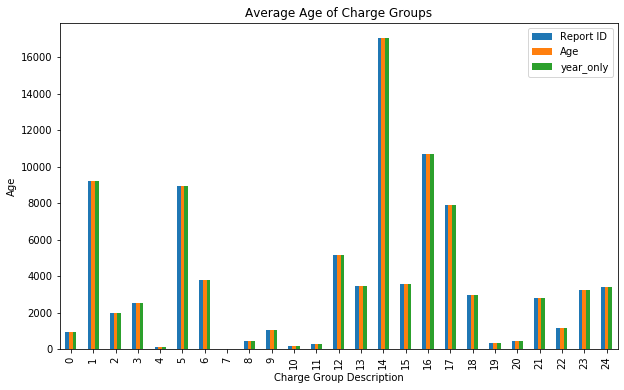

In [74]:
dftrialcharge_0.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Charge Group Description') # add to x-label to the plot
plt.ylabel('Age') # add y-label to the plot
plt.title('Average Age of Charge Groups') # add title to the plot

plt.show()

dftrialcharge_0.dropna(subset=[('Charge Group Description'=='Pre-Delinquency') |(df['Charge Group Description']=='Non-Criminal Detention')], axis=0, inplace=True)

# reset index, because we droped two rows
dftrialcharge_0.reset_index(drop=True, inplace=True)

dftrialcharge.dropna(subset=[('Charge Group Description'=='Pre-Delinquency') |(df['Charge Group Description']=='Non-Criminal Detention')], axis=0, inplace=True)


In [ ]:
dfarrests2018 =df[(df['Area Name']=='Central') & (df['year_only']==2018)]

In [ ]:
ufo.loc[ufo.City=='Oakland', 'State']

In [ ]:
dfquantile = dfAgeCharge2018[(dfAgeCharge2018.loc[['Vehicle Theft', 'Robbery', 'Burglary', 'Receive Stolen Property']) & (dfAgeCharge2018['year_only']==2018)]

In [ ]:
dfAgeCharge2018